In [2]:
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.spatial import distance

from utils import *

In [8]:
from optimization.range.MethodSven import method_sven_iterations_list
from optimization.range.MethodSven import method_sven

from optimization.range.SearchDichotomous import search_method_dichotomous_iterations_list
from optimization.range.SearchDichotomous import search_dichotomous

from optimization.range.HalvingMethod import halving_method
from optimization.range.HalvingMethod import halving_method_iterations_list

from optimization.range.SearchGoldenSection import search_golden_section
from optimization.range.SearchGoldenSection import search_golden_section_iterations_list

from optimization.range.SearchPitchAdaptation import search_pitch_adaptation
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_list
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_label

from interpolition.ThreePointQuadratic import threePointQuadratic
from interpolition.ThreePointQuadratic import threePointQuadratic_list
from interpolition.ThreePointQuadratic import threePointQuadratic_label

from interpolition.CubicInterpolation import cubicInterpolation
from interpolition.CubicInterpolation import threePointQuadratic_list
from interpolition.CubicInterpolation import threePointQuadratic_label

from optimization.n_dimensional.CoordinateDescent import get_coordinate_descent
from optimization.n_dimensional.CoordinateDescent import coordinate_descent_iter_list

from optimization.n_dimensional.MethodFletcherReeves import get_method_fletcher_reeves
from optimization.n_dimensional.MethodFletcherReeves import method_of_steepest_descent_iter_list

from optimization.n_dimensional.MethodPolakRibiere import get_method_polak_ribiere
from optimization.n_dimensional.MethodPolakRibiere import method_polak_ribiere_iter_list

In [4]:
x0 = 3.0
h = 2.0
n = 200

count_invoke = 0
f = lambda x: 20 * (x + 5).__pow__(2)
f_arr = lambda X: np.transpose([X, f(X)])

columns = ['x', 'y', 'h']
epsilon = 0.02
iter = 500

In [5]:
def f(X):
    return (X[0] - 1) ** 2 + (X[1] - 1) ** 2


nd_start_point = np.array([-15.0, -15.0])
nd_epsilon = 0.1
nd_iter = 200


def derivative(X):
    return optimize.approx_fprime(X, f, epsilon)

In [6]:
def draw_3d_function(f, steps, width, height):
    X, Y = np.meshgrid(np.linspace(-width, width, 30), np.linspace(-height, height, 30))

    fig = plt.figure(figsize=(16, 10))
    ax = fig.gca(projection='3d')

    zs = np.array([f(np.array([x, y])) for x, y in zip(np.ravel(Y), np.ravel(X))])
    Z = zs.reshape(X.shape)

    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)
    ax.plot(xs=steps[0], ys=steps[1], zs=steps[2],
            marker='*', markersize=20, zorder=3,
            markerfacecolor='y', lw=3, c='black')
    return ax


def add_sven_to_optimisation(optimization_algoritm):
    def optimization(f, x):
        range = method_sven(0, h, f, n)
        result = search_dichotomous(f, min(range), max(range), epsilon=epsilon, iter=iter)
        return result[0]

    return optimization

<ipython-input-9-ab8bca675abc>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 0]),
<ipython-input-9-ab8bca675abc>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 1]),
<ipython-input-9-ab8bca675abc>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

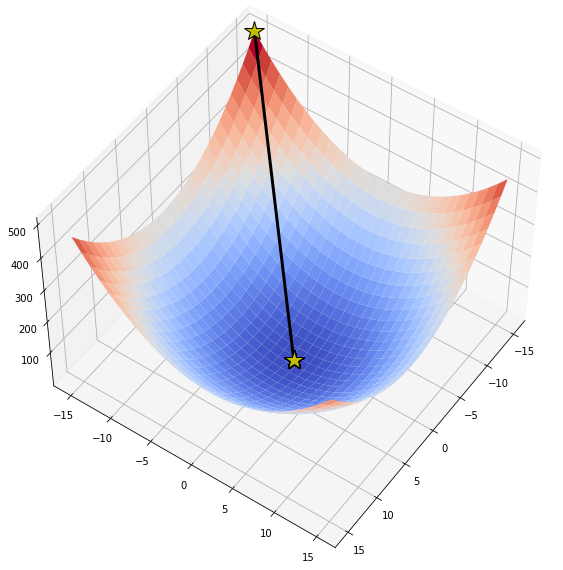

array([0.97609602, 0.97609602])

In [9]:

from utils.utils import to_nd_array

opt_fun = get_method_fletcher_reeves(add_sven_to_optimisation(search_dichotomous))
res = opt_fun(f, derivative, nd_start_point, epsilon, nd_iter)

steps = [
    np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 0]),
    np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 1]),
    np.array(np.array(method_of_steepest_descent_iter_list)[:, 1])
]

ax = draw_3d_function(f, np.array(steps), 15, 15)

ax.view_init(50, 35)
plt.show()
res

In [10]:
np.array(method_of_steepest_descent_iter_list)

<ipython-input-10-ede0f385c982>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(method_of_steepest_descent_iter_list)


array([[array([-15., -15.]), 512.0, 0],
       [array([0.99204322, 0.99204322]), 0.00012662057771459318,
        22.616164417033815],
       [array([0.97609602, 0.97609602]), 0.0011428000541969378,
        0.022552744890219724],
       [array([0.99204322, 0.99204322]), 0.00012662057771459318,
        0.022552744890219724],
       [array([0.97609602, 0.97609602]), 0.0011428000541969378,
        0.022552744890219724],
       [array([0.99204322, 0.99204322]), 0.00012662057771459318,
        0.022552744890219724],
       [array([0.97609602, 0.97609602]), 0.0011428000541969378,
        0.022552744890219724],
       [array([0.99204322, 0.99204322]), 0.00012662057771459318,
        0.022552744890219724],
       [array([0.97609602, 0.97609602]), 0.0011428000541969378,
        0.022552744890219724],
       [array([0.99204322, 0.99204322]), 0.00012662057771459318,
        0.022552744890219724],
       [array([0.97609602, 0.97609602]), 0.0011428000541969378,
        0.022552744890219724],
       

<ipython-input-11-8e286a337949>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_polak_ribiere_iter_list)[:, 0])[:, 0]),
<ipython-input-11-8e286a337949>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_polak_ribiere_iter_list)[:, 0])[:, 1]),
<ipython-input-11-8e286a337949>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this

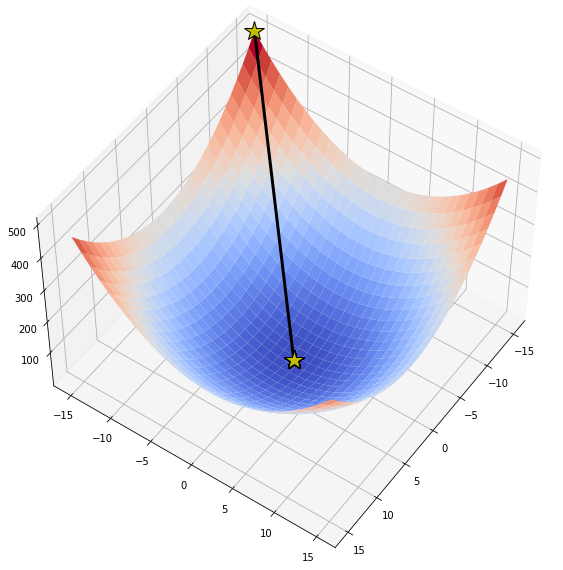

array([0.97609602, 0.97609602])

In [11]:
from utils.utils import to_nd_array

opt_fun = get_method_polak_ribiere(add_sven_to_optimisation(search_dichotomous))
res = opt_fun(f, derivative, nd_start_point, epsilon, nd_iter)

steps = [
    np.array(to_nd_array(np.array(method_polak_ribiere_iter_list)[:, 0])[:, 0]),
    np.array(to_nd_array(np.array(method_polak_ribiere_iter_list)[:, 0])[:, 1]),
    np.array(np.array(method_polak_ribiere_iter_list)[:, 1])
]

ax = draw_3d_function(f, np.array(steps), 15, 15)

ax.view_init(50, 35)
plt.show()
res

In [12]:
np.array(method_polak_ribiere_iter_list)

<ipython-input-12-86d8170675ea>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(method_polak_ribiere_iter_list)


array([[array([-15., -15.]), 512.0, 0],
       [array([0.99204322, 0.99204322]), 0.00012662057771459318,
        22.616164417033815],
       [array([0.97609602, 0.97609602]), 0.0011428000541969378,
        0.022552744890219724],
       [array([0.99204322, 0.99204322]), 0.00012662057771459318,
        0.022552744890219724],
       [array([0.97609602, 0.97609602]), 0.0011428000541969378,
        0.022552744890219724],
       [array([0.99204322, 0.99204322]), 0.00012662057771459318,
        0.022552744890219724],
       [array([0.97609602, 0.97609602]), 0.0011428000541969378,
        0.022552744890219724],
       [array([0.99204322, 0.99204322]), 0.00012662057771459318,
        0.022552744890219724],
       [array([0.97609602, 0.97609602]), 0.0011428000541969378,
        0.022552744890219724],
       [array([0.99204322, 0.99204322]), 0.00012662057771459318,
        0.022552744890219724],
       [array([0.97609602, 0.97609602]), 0.0011428000541969378,
        0.022552744890219724],
       